# Carregando os dados

Antes de qualquer coisa, precisamos carregar os dados na memória para trabalharmos com eles. Existem várias estratégias para isso, aqui usaremos a mais simples que é carregar tudo de uma vez. Note que isso não é sempre possível, pois atualmente várias bases de dados possuem tamanhos enormes. Portanto, nesses casos é interessante ler em blocos menores e processar esses blocos, ou mesmo ler cada linha individualmente.

Note que essas aulas serão fortemente baseadas no seguinte notebook: LINK. Entretanto, nos aprofundaremos um pouco mais em alguns pontos em nossas aulas.

Primeiro, vamos usar o pandas para lidar facilmente com os dados

In [1]:
import pandas as pd
from context import fakenews

In [2]:
reals = pd.read_csv('../data/True.csv')
fakes = pd.read_csv('../data/Fake.csv')

O método `read_csv` nos permite ler facilmente arquivos de text, no nosso caso um arquivo em csv. Ele nos retorna um DataFrame, uma abstração que nos permite trabalhar de forma mais ágil com basees de dados.

Por exemplo, podemos visualizar as primeiras amostras da seguinte forma

In [3]:
reals.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fakes.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fakes.isna()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
23476,False,False,False,False
23477,False,False,False,False
23478,False,False,False,False
23479,False,False,False,False


In [6]:
import fakenews.preprocess as prep

nfakes, __ = fakes.shape
nreals, __ = reals.shape
prep.remove_missing(fakes, reals)
print(f'Fakes without text: {nfakes - fakes.shape[0]}')
print(f'Reals without text: {nreals - reals.shape[0]}')

Fakes without text: 630
Reals without text: 1


Encontramos 631 amostras sem texto! Isso também pode ser extendido para as outras colunas.

Agora, vamos verificar como estão os dados nas outras colunas. Podemos usar o método value counts, hist, ou mesmo o describe para ter uma panorama de como estão nossos dados.

In [7]:
fakes.subject.value_counts()

News               9050
politics           6433
left-news          4309
Government News    1498
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [8]:
fakes.subject.describe()

count     22851
unique        6
top        News
freq       9050
Name: subject, dtype: object

<AxesSubplot:>

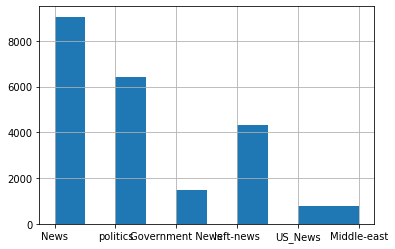

In [9]:
fakes.subject.hist()

In [10]:
reals.subject.value_counts()

politicsNews    11271
worldnews       10145
Name: subject, dtype: int64

In [11]:
reals.subject.describe()

count            21416
unique               2
top       politicsNews
freq             11271
Name: subject, dtype: object

<AxesSubplot:>

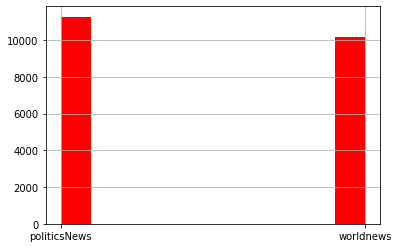

In [12]:
reals.subject.hist(color='red')

Podemos acessar as colunas como atributos de uma classe, ou como índices de um dicionário (`fakes['subject']` seria o equivalente ao código acima).
O método value_counts nos retorna quantas vezes cada valor ocorre na coluna (Series). Dessa forma, podemos ver que os valores diferem quanto as 
amostras positivas e negativas. Portanto, não podemos usar esse tipo de dado.

Podemos remover rapidamente qualquer coluna de um DataFrame usando o método `.drop()(`

In [13]:
fakes.drop(columns=['subject', 'date'], inplace=True)
fakes.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


Fazendo o mesmo para a base `Real`

In [14]:
reals.drop(columns=['subject', 'date'], inplace=True)
reals.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


Agora, precisamos remover a infomação sobre a editora das notícias. Isso é necessário pois esse tipo de informação está como palavras e contido apenas nas notícias reais, podendo gerar um bias nos resultados

In [15]:
prep.remove_publisher(reals)
reals.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...


Finalmente, juntamos o título e o corpo da notícia em uma só coluna

In [16]:
reals.text = reals.title + ' ' + reals.text
fakes.text = fakes.title + ' ' + fakes.text

reals.drop(columns='title', inplace=True)
fakes.drop(columns='title', inplace=True)

reals.head()

,text
0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...


E então rotulamos os dados

In [17]:
import numpy as np

reals['cls'] = np.ones(len(reals.index), dtype=np.int16)
fakes['cls'] = np.ones(len(fakes.index), dtype=np.int16) * 2

Agora, vamos ver como estão nossos dados

In [18]:
reals.head()

,text,cls
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [19]:
fakes.head()

,text,cls
0,Donald Trump Sends Out Embarrassing New Year’...,2
1,Drunk Bragging Trump Staffer Started Russian ...,2
2,Sheriff David Clarke Becomes An Internet Joke...,2
3,Trump Is So Obsessed He Even Has Obama’s Name...,2
4,Pope Francis Just Called Out Donald Trump Dur...,2


Finalmente, juntamos tudo em um único dataframe

In [20]:
data = pd.concat([fakes, reals], ignore_index=True)
data.head()

,text,cls
0,Donald Trump Sends Out Embarrassing New Year’...,2
1,Drunk Bragging Trump Staffer Started Russian ...,2
2,Sheriff David Clarke Becomes An Internet Joke...,2
3,Trump Is So Obsessed He Even Has Obama’s Name...,2
4,Pope Francis Just Called Out Donald Trump Dur...,2


Agora, precisamos remover pontuação, separar em palavras, etc. Ou seja, precisa tokenizar as notícias. Nessa parte, podemos usar o NLTK assim como foi usado no notebook de referência.

In [21]:
import nltk

stopwords = set(nltk.corpus.stopwords.words("english"))

A linha acima gera um conjunto de stopwords, ou seja, palavras como "i", "any", "won", "y". Note que algumas dessas podem fazer alguma diferença na classificação, como exemplo temos a palavra "won". Entretanto isso depende de uma análise mais profunda.

In [22]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

Acima, criamos uma tokenizador para sequências alfabéticas. Por exemplo, não entra dinheiro, cifras, etc

In [23]:
tokenizer.tokenize("My name is!")

['My', 'name', 'is']

In [24]:
tokenizer.tokenize("I spent $3.000 dollars on this computer!")

['I', 'spent', '3', '000', 'dollars', 'on', 'this', 'computer']

Agora, precisamos apenas iterar sobre as notícias e fazer a tokenização de cada uma (excluindo as stopwords)!

In [ ]:
def is_valid_word(word):
    return word not in stopwords and len(word) > 1


tokenized_sentences = []
for news in data['text'].values:
    tmp = []
    sentences = nltk.sent_tokenize(news)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtwords = [w.strip() for w in tokens if is_valid_word(w)]
        tmp.extend(filtwords)
    tokenized_sentences.append(tmp)
print(tokenized_sentences[0][:10])

E pra essa aula é só!